In [1]:
from load_data import LoadDataset
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Masking, Embedding, LSTM

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import  ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [2]:
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [3]:
selected_features = ['destination_port',
            'init_win_bytes_backward',
            'init_win_bytes_forward',
            'bwd_packets_s',
            'fwd_iat_min',
            'min_seg_size_forward',
            'flow_iat_min',
            'flow_duration',
            'total_length_of_fwd_packets',
            'total_backward_packets',
            'bwd_iat_min',
            'bwd_packet_length_std',
            'fwd_iat_total',
            'fwd_packet_length_mean',
            'fwd_packet_length_max',
            'flow_iat_std',
            'fwd_packets_s',
            'down_up_ratio',
            'total_fwd_packets',
            'bwd_packet_length_min',
            'flow_bytes_s',
            'bwd_header_length',
            'packet_length_mean',
            'total_length_of_bwd_packets',
            "label"]

In [ ]:
df_test = LoadDataset("./raw/raw_testset.csv", columns = selected_features, modify_datatype = True)

In [ ]:
df_train = LoadDataset("./oversampling/NRAS_trainset.csv", columns = selected_features, modify_datatype = True)

In [ ]:
X_train = df_train.drop('label', axis = 1)
y_train = df_train['label']

X_test = df_test.drop('label', axis = 1)
y_test = df_test['label']

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
input_dim = X_train.shape[1]
num_classes = len(y_train.unique())

model = Sequential([
    Embedding(X_train.shape[0], X_train.shape[1], input_length = input_dim, 
              trainable = False, mask_zero = True),
    Masking(mask_value = 0.0), # for pre-trained embeddings
    LSTM(76, return_sequences = False, dropout = 0.1, recurrent_dropout = 0.1), # Recurrent layer
    
    # Recurrent layer
    Dense(64, activation = 'relu'),
    Dropout(0.1),
    Dense(32, activation = 'relu'),
    Dropout(0.1),
    Dense(16, activation = 'relu'),
    Dropout(0.5),
    
    # Output layer
    Dense(num_classes, activation = 'softmax')
])

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2,
                                  patience = 3, min_lr = 0.00001)
early_stop_callback = EarlyStopping(monitor = 'loss', patience = 5)

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.0001)

In [5]:
hist = model.fit(X_train, y_train,
                    batch_size = 64, epochs = 30,
                    callbacks = [reduce_lr, early_stop_callback],
                    validation_data = (X_test, y_test))

Epoch 1/30
3072/3072 [==============================] - 950s 308ms/step - loss: 0.3422 - accuracy: 0.8291 - val_loss: 0.0112 - val_accuracy: 0.9960
Epoch 2/30
3072/3072 [==============================] - 943s 307ms/step - loss: 0.0510 - accuracy: 0.9757 - val_loss: 0.0076 - val_accuracy: 0.9978
Epoch 3/30
3072/3072 [==============================] - 935s 304ms/step - loss: 0.0404 - accuracy: 0.9840 - val_loss: 0.0068 - val_accuracy: 0.9979
Epoch 4/30
3072/3072 [==============================] - 926s 301ms/step - loss: 0.0354 - accuracy: 0.9865 - val_loss: 0.0053 - val_accuracy: 0.9979
Epoch 5/30
3072/3072 [==============================] - 918s 299ms/step - loss: 0.0294 - accuracy: 0.9870 - val_loss: 0.0062 - val_accuracy: 0.9979
Epoch 6/30
3072/3072 [==============================] - 926s 301ms/step - loss: 0.0242 - accuracy: 0.9898 - val_loss: 0.0044 - val_accuracy: 0.9980
Epoch 7/30
3072/3072 [==============================] - 930s 303ms/step - loss: 0.0193 - accuracy: 0.9926 - val_

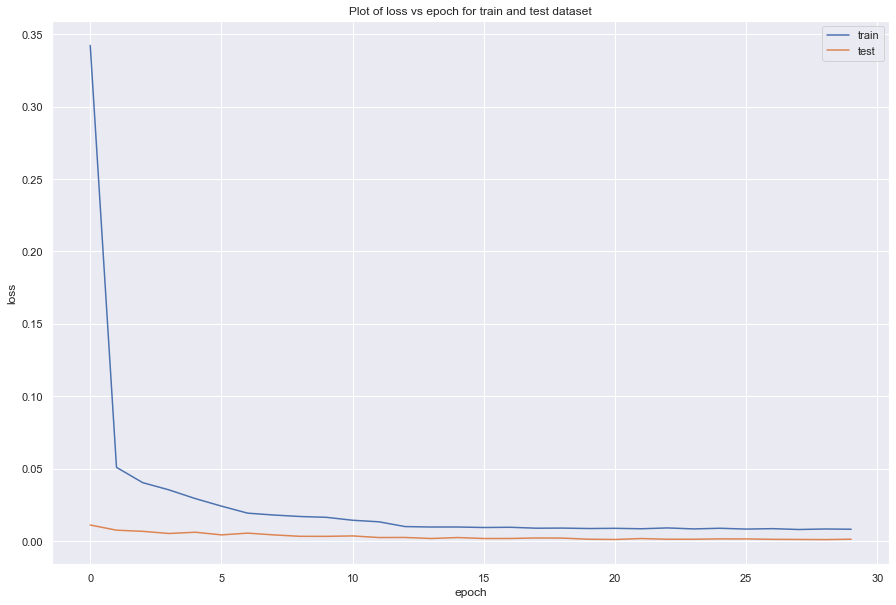

In [6]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

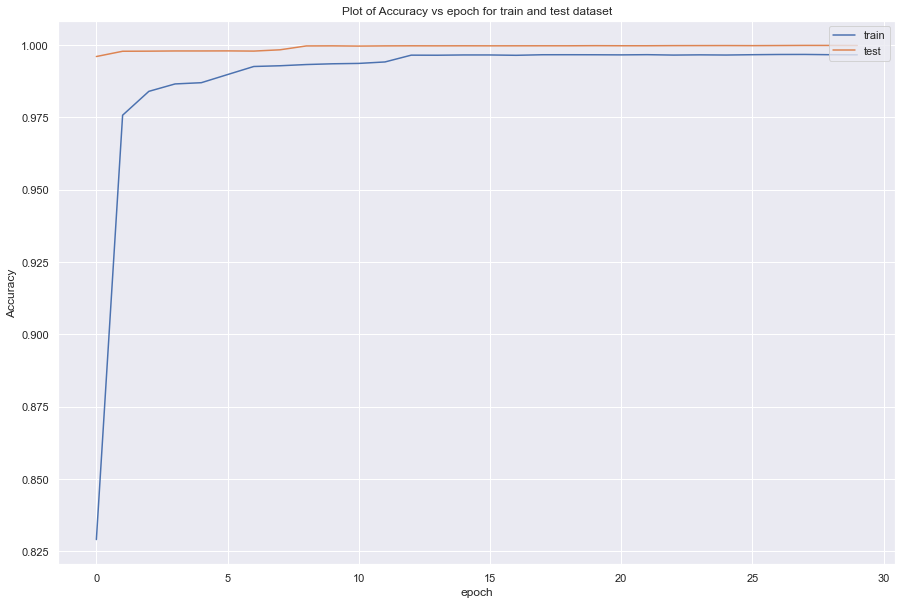

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Plot of Accuracy vs epoch for train and test dataset")
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()